# University of Warsaw - Machine Learning 2
## Classification project - Adam Janczyszyn & Hubert Wojewoda

**Project Description:**

This notebook outlines our machine learning project for "Machine Learning 2" course, focusing on regression techniques to predict a the target variable. The project is neatly organized into several sections, each serving a distinct purpose in the data science pipeline. The dataset used is the quality of wine dataset, which contains 22 features and 1 target variable. The goal of the project is to predict the quality of wine based on the given features. The project is organized as follows:

1. Data Loading and Preliminary Analysis
2. Data Visualization
3. Statistical Analysis
4. Data Preprocessing
5. Model Building and Evaluation
6. Conclusion

With some additional sections and notes in between.

**Dataset Description:**

- **Fixed Acidity**: Measures tartaric acid levels, affecting wine's taste and color.
- **Volatile Acidity**: Indicates acetic acid amount; high levels can lead to a vinegar taste.
- **Citric Acid**: Added for flavor enhancement and color stability.
- **Residual Sugar**: Determines sweetness; remaining sugar post-fermentation.
- **Chlorides**: Measures salt content in the wine.
- **Free Sulfur Dioxide**: Prevents oxidation and microbial growth.
- **Total Sulfur Dioxide**: Sum of bound and free SO2; affects smell and taste.
- **Density**: Related to alcohol and sugar content, close to water density.
- **pH**: Measures wine's acidity; most wines are between 3-4 on the pH scale.
- **Sulphates**: Additives contributing to antimicrobial and antioxidant properties.
- **Alcohol**: Percentage of alcohol by volume, influencing taste and body.
- **Quality (TARGET)**: Sensory score from 0 to 10 by wine experts, indicating overall wine quality.

**Additional Information:**
- 10 features added artificially.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from ydata_profiling import ProfileReport
from pathlib import Path

from plotly.offline import init_notebook_mode
import plotly.express as px
import plotly.io as pio
import plotly.graph_objs as go

init_notebook_mode(connected=True)

from sklearn.model_selection import RandomizedSearchCV, KFold
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error


pd.set_option('display.max_columns', None)
%matplotlib inline

In [2]:
source_data_path = Path.cwd().parent / "data/r2.csv"
df = pd.read_csv(source_data_path)

print(df.shape)

(1400, 23)


In [3]:
# Data profiling
# profile = ProfileReport(df, title="Profiling Report")
# profile.to_file("regression_profile_report.html")

## Data Loading and Preliminary Analysis

After the initial setup, we dive into the dataset by loading it from a CSV file. This dataset serves as the cornerstone of our project, containing the features and target variable we'll explore and predict. The ProfileReport generated offers a bird's-eye view of the dataset, highlighting areas that require cleaning or transformation. We examine the dataset's structure, summarize its statistics, identify data types, and check for missing values or duplicates. This is vital for laying a solid foundation for our analysis, ensuring the data is clean and ready for deeper exploration.

- **Observations:**
    - The dataset contains 1400 rows and 23 columns.
    - There are no missing values or duplicates.
    - The target variable is "quality", which is a continuous variable (0-10).
    - The features are all continuous, with no categorical variables.
    - The dataset is mostly clean and ready for further analysis.

- **Actions:**
    - No immediate actions are required, as the dataset is clean and ready for exploration.
    - We may only want to scale the features for better model performance in models that require it.

In [4]:
df

,id,alcohol,chlorides,citric acid,density,feat01,feat02,feat03,feat04,feat05,feat06,feat07,feat08,feat09,feat10,fixed acidity,free sulfur dioxide,pH,quality,residual sugar,sulphates,total sulfur dioxide,volatile acidity
0,1,9.6,0.081,0.44,0.98920,0.777174,0.101811,0.615949,0.335220,0.072921,0.550654,0.321462,0.742844,0.120581,0.762964,9.7,23.0,3.49,4.248582,2.2,4.63,67.0,0.600
1,2,11.9,0.074,0.01,1.00371,0.682378,0.702689,0.595187,0.738317,0.079608,0.360016,0.668480,0.158404,0.377644,0.704609,7.9,33.0,3.44,6.365523,2.0,4.57,41.0,0.725
2,3,9.6,0.084,0.49,1.00870,0.477076,0.491814,0.123014,0.491648,0.112396,0.113222,0.413835,0.388120,0.513607,0.334223,9.2,23.0,3.38,5.094680,2.5,4.57,75.0,0.470
3,4,11.0,0.081,0.33,1.00490,0.745925,0.741657,0.769887,0.298042,0.167762,0.503632,0.839153,0.101733,0.157231,0.746054,7.1,24.0,3.44,5.903533,2.1,4.75,36.0,0.410
4,5,9.4,0.080,0.24,0.99620,0.729406,0.606721,0.425811,0.276605,0.944117,0.583265,0.542587,0.015201,0.796945,0.733268,7.8,6.0,3.31,6.267095,1.7,4.59,12.0,0.420
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,1396,10.4,0.082,0.35,0.99798,0.192436,0.723544,0.199929,0.430688,0.967864,0.333939,0.500769,0.650995,0.409950,0.017794,10.7,26.0,3.24,6.535230,3.2,4.69,69.0,0.420
1396,1397,9.4,0.095,0.44,0.99708,0.704294,0.039272,0.161863,0.314071,0.774961,0.370215,0.480095,0.372677,0.517385,0.452004,9.5,11.0,3.31,4.568697,1.8,4.55,23.0,0.430
1397,1398,10.1,0.094,0.19,1.00787,0.882430,0.440148,0.837819,0.569797,0.357397,0.964399,0.281663,0.283731,0.553142,0.463633,9.0,32.0,3.25,7.242271,3.9,4.50,71.0,0.600
1398,1399,9.3,0.062,0.15,1.00550,0.545192,0.776621,0.897308,0.493320,0.982628,0.743984,0.453231,0.145450,0.573566,0.566089,6.3,8.0,3.45,5.288451,1.7,4.57,21.0,0.380


In [5]:
df = df.drop(["id"], axis=1)

In [6]:
df.describe()

,alcohol,chlorides,citric acid,density,feat01,feat02,feat03,feat04,feat05,feat06,feat07,feat08,feat09,feat10,fixed acidity,free sulfur dioxide,pH,quality,residual sugar,sulphates,total sulfur dioxide,volatile acidity
count,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000
mean,10.448952,0.088066,0.266614,0.996479,0.507285,0.502299,0.497422,0.566105,0.504341,0.491452,0.533672,0.495680,0.481231,0.509657,8.473500,17.682500,3.341171,5.672880,2.478036,4.659914,46.018214,0.532204
std,1.088010,0.051301,0.192782,0.008356,0.288782,0.288905,0.294221,0.145636,0.293062,0.293464,0.155473,0.292775,0.282322,0.290980,1.695026,10.182296,0.155170,1.228327,1.495805,0.176925,33.115608,0.179329
min,8.400000,0.002000,0.000000,0.980640,0.000218,0.000313,0.000349,0.000000,0.000021,0.000036,0.000000,0.000135,0.001477,0.000084,4.800000,3.000000,2.770000,1.779748,0.800000,4.330000,4.000000,0.100000
25%,9.600000,0.068000,0.090000,0.987900,0.258741,0.254741,0.242745,0.470649,0.245694,0.232186,0.431970,0.232204,0.246504,0.258636,7.300000,9.000000,3.247500,4.876816,1.800000,4.550000,22.000000,0.390000
50%,10.200000,0.079000,0.260000,0.996575,0.521402,0.497249,0.489134,0.566440,0.505717,0.492514,0.534345,0.508273,0.471531,0.509987,8.100000,15.000000,3.340000,5.680422,2.100000,4.620000,37.000000,0.520000
75%,11.100000,0.092000,0.420000,1.005443,0.758829,0.764290,0.761797,0.663905,0.761428,0.745832,0.634351,0.747981,0.708799,0.762227,9.400000,23.000000,3.430000,6.473893,2.500000,4.730000,62.000000,0.640000
max,15.000000,0.611000,1.000000,1.013150,0.999564,0.999118,0.999650,1.000000,0.998952,0.997947,1.000000,0.998726,0.999335,0.999402,16.100000,74.000000,4.040000,10.545302,15.400000,6.000000,287.000000,1.330000


In [7]:
# check the data types
df.dtypes

alcohol                 float64
chlorides               float64
citric acid             float64
density                 float64
feat01                  float64
feat02                  float64
feat03                  float64
feat04                  float64
feat05                  float64
feat06                  float64
feat07                  float64
feat08                  float64
feat09                  float64
feat10                  float64
fixed acidity           float64
free sulfur dioxide     float64
pH                      float64
quality                 float64
residual sugar          float64
sulphates               float64
total sulfur dioxide    float64
volatile acidity        float64
dtype: object

In [8]:
# check for missing values
df.isnull().sum()

alcohol                 0
chlorides               0
citric acid             0
density                 0
feat01                  0
feat02                  0
feat03                  0
feat04                  0
feat05                  0
feat06                  0
feat07                  0
feat08                  0
feat09                  0
feat10                  0
fixed acidity           0
free sulfur dioxide     0
pH                      0
quality                 0
residual sugar          0
sulphates               0
total sulfur dioxide    0
volatile acidity        0
dtype: int64

In [9]:
df.duplicated().sum()

0

## Data Visualization

With the data prepped, we move on to visualization. We plot histograms for each continuous variable to understand their distributions, spotting any skewness or outliers that may influence our models. The correlation heatmap, created with Plotly, illuminates the relationships between features, guiding us towards understanding which variables might have more predictive power or if multicollinearity could be a concern in our models.

We perform an in-depth analysis of each feature's histogram, identifying potential transformations to make the data more suitable for our models. Check their distributions, and identify potential outliers. In the case of our simple dataset, this step is less crucial, but it's a good habit to develop for more complex datasets.

- **Observations:**
    - The features are mostly normally distributed, with some skewness in a few variables.
    - The correlation heatmap shows some strong relationships between features.
    - There are no significant outliers in the dataset.

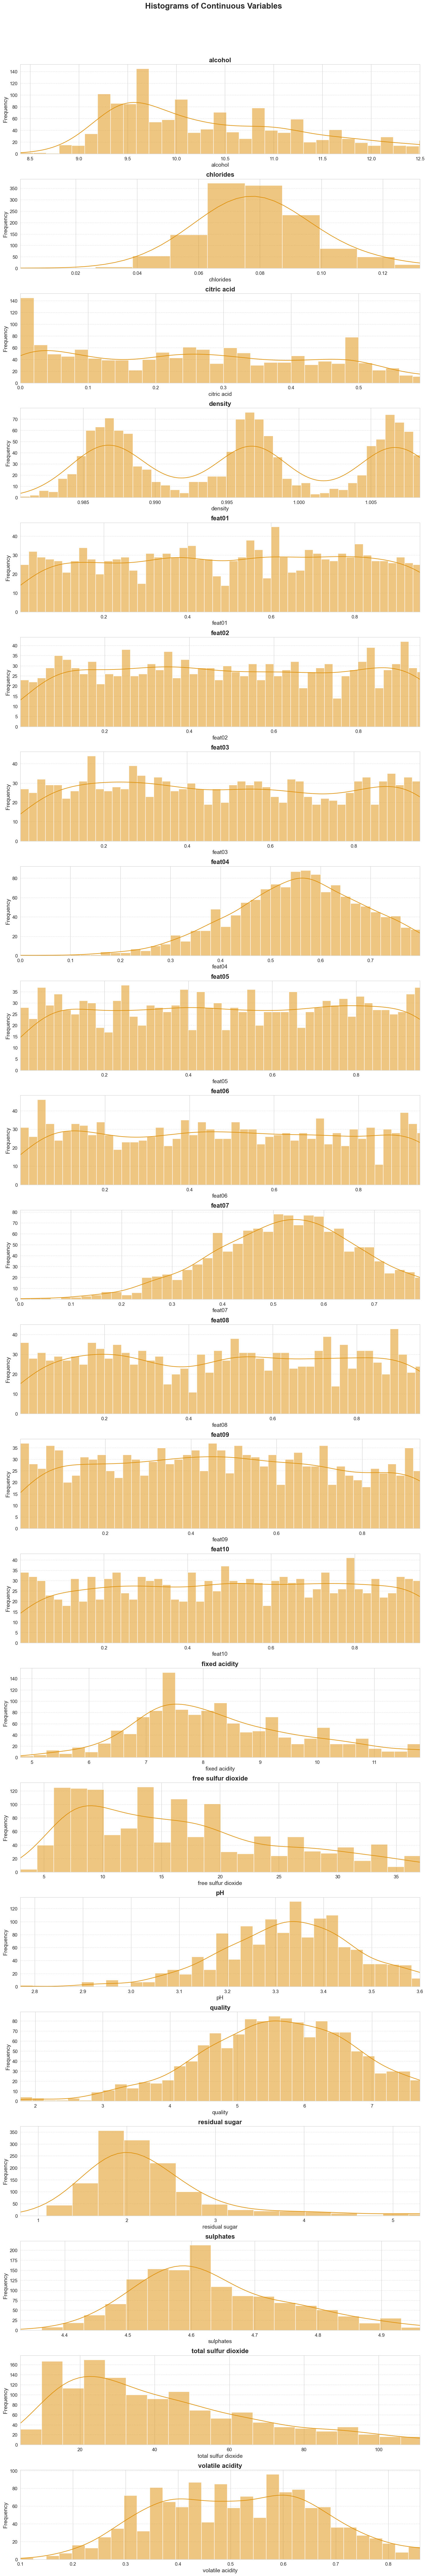

In [10]:
def plot_histograms(
    data: pd.DataFrame,
    columns: list,
    bins: int = 100,
    min_quantile: float = 0.0,
    max_quantile: float = 0.99,
) -> None:
    sns.set_palette("colorblind")

    fig, axes = plt.subplots(len(columns), 1)
    fig.set_size_inches(15, 4 * len(columns))

    for ax, col in zip(axes, columns):
        sns.histplot(
            data[col], bins=bins, kde=True, ax=ax, color=sns.color_palette()[1]
        )

        ax.set_xlabel(col, fontsize=14)
        ax.set_ylabel("Frequency", fontsize=14)

        ax.set_title(col, fontsize=16, fontweight="bold")

        ax.grid(axis="y", linestyle="--", alpha=0.6)

        ax.tick_params(axis="both", which="major", labelsize=12)
        ax.tick_params(axis="both", which="minor", labelsize=10)

        ax.set_xlim(
            data[col].quantile(q=min_quantile), data[col].quantile(q=max_quantile)
        )

    plt.tight_layout()

    plt.suptitle(
        "Histograms of Continuous Variables", y=1.02, fontsize=20, fontweight="bold"
    )

    plt.show()


plot_histograms(data=df, columns=df.columns, bins=50, min_quantile=0, max_quantile=0.95)

In [11]:
df_corr = df

corr = df_corr.corr()
pio.templates.default = "plotly_white"

trace = go.Heatmap(
    z=corr.values,
    x=corr.index.values,
    y=corr.columns.values,
    colorscale=px.colors.sequential.RdBu,
    zmin=-1,
    zmax=1,
)

layout = go.Layout(
    title="Pearson Correlation of features",
    xaxis=dict(ticks="", nticks=52),
    yaxis=dict(ticks=""),
    width=800,
    height=600,
    margin=dict(
        l=240,
    ),
)

fig = go.Figure(layout=layout)
fig.add_trace(trace)
fig.show()

## Statistical Analysis

Up next is the statistical analysis, where we calculate the Spearman correlation coefficients to identify the relationships between features and the target variable. The function we developed also checks whether the relationships are statistically significant, providing a deeper understanding of the dataset. This can be beneficial for feature selection, as it guides us towards the most influential variables for our models.

**Observations:**

- **Positive Correlation**: 
  - The feature `alcohol` has the highest positive correlation with wine quality, indicating that higher alcohol content might be associated with higher quality ratings.
  - Other features showing a significant positive correlation include `feat07`, `sulphates`, `feat04`, `citric acid`, and `fixed acidity`. 
  - These positive correlations suggest that as the value of these features increases, so does the quality of the wine.

- **Negative Correlation**:
  - On the other hand, features like `free sulfur dioxide`, `volatile acidity`, and `chlorides` show a significant negative correlation with wine quality.
  - This suggests that lower values of these particular features might be associated with higher quality wines.

- **Statistical Significance**:
  - The chart differentiates between statistically significant correlations (shown in orange) and those that are not statistically significant (shown in blue).
  - Statistical significance here likely means that the correlation coefficients are different from zero with a level of confidence (p < 0.05).

- **Wine Quality Explained**:
  - **Alcohol**: It can carry the flavors and aromas of wine more effectively. Additionally, alcohol is often the result of complete fermentation, which can also be an indicator of a well-developed wine.
  - **Sulphates (including Sulphur Dioxide)**: Used as preservatives in wine. They also inhibit the growth of harmful yeast and bacteria. The positive correlation may suggest that the right amount of sulphates can help preserve the desired flavors and prevent spoilage, contributing to higher quality.
  - **Citric Acid**: Can be indicative of the wine's freshness and can contribute to its overall flavor profile. Wines with balanced acidity tend to be rated higher in quality since they are more palatable and age better.
  - **Fixed Acidity**: Wines with higher fixed acidity are often fresher and more vibrant, which can be perceived as a sign of quality, especially in white wines.


In [12]:
def calculate_correlation(data: pd.DataFrame, target_col: str) -> dict:
    numeric_df = data.select_dtypes(include=np.number).dropna()
    correlation_results = {}

    for col in [col for col in numeric_df.columns if col != target_col]:
        correlation, p_value = stats.spearmanr(numeric_df[col], numeric_df[target_col])
        correlation_results[col] = {"correlation": correlation, "p_value": p_value}

    return correlation_results


def sort_dict(dictionary: dict) -> dict:
    return dict(sorted(dictionary.items(), key=lambda item: item[1], reverse=False))


def plot_correlation_bars(significant_cols, not_significant_cols, target_col):
    fig, ax = plt.subplots(1, 1)
    fig.set_size_inches(8, 0.5 * len(significant_cols) + len(not_significant_cols))

    ax.barh(
        list(not_significant_cols.keys()),
        list(not_significant_cols.values()),
        label="Not statistically significant correlation",
    )
    ax.barh(
        list(significant_cols.keys()),
        list(significant_cols.values()),
        label="Statistically significant correlation",
    )

    ax.set_title(f"Spearman correlation with {target_col} variable")
    ax.set_xlabel("Correlation coefficient", size=10)
    ax.set_ylabel("Column", size=10)
    ax.margins(0.01)
    ax.tick_params(axis="both", labelsize=10)
    plt.legend(loc="lower right", fontsize="x-small")


def get_correlation_data_and_plot(
    df: pd.DataFrame,
    significance_level: float = 0.05,
    target_col: str = "target",
) -> tuple:
    correlation_data = calculate_correlation(df, target_col)

    significant_cols = {
        col: result["correlation"]
        for col, result in correlation_data.items()
        if result["p_value"] <= significance_level
    }
    not_significant_cols = {
        col: result["correlation"]
        for col, result in correlation_data.items()
        if result["p_value"] > significance_level
    }

    sorted_significant_cols = sort_dict(significant_cols)
    sorted_not_significant_cols = sort_dict(not_significant_cols)

    plot_correlation_bars(
        sorted_significant_cols, sorted_not_significant_cols, target_col
    )

    return sorted_significant_cols, sorted_not_significant_cols

Significant Columns:
{'volatile acidity': -0.25677915515117905, 'total sulfur dioxide': -0.14056537561456497, 'chlorides': -0.08641951693704562, 'free sulfur dioxide': -0.07501563843830436, 'feat08': 0.05397778135178436, 'fixed acidity': 0.05759583645135066, 'citric acid': 0.127275260885518, 'feat04': 0.19851154949239194, 'sulphates': 0.22272291939781444, 'feat07': 0.2611585076305124, 'alcohol': 0.2843706268994404}

Not Significant Columns:
{'pH': -0.03541990245014605, 'feat05': -0.01620836305939096, 'density': -0.0008852728572135565, 'feat01': 0.0005961913405850321, 'feat06': 0.00306486491945873, 'feat10': 0.006889510933501529, 'feat02': 0.018560773444922646, 'feat03': 0.020530924112562042, 'residual sugar': 0.02676553738712126, 'feat09': 0.028368472819927208}


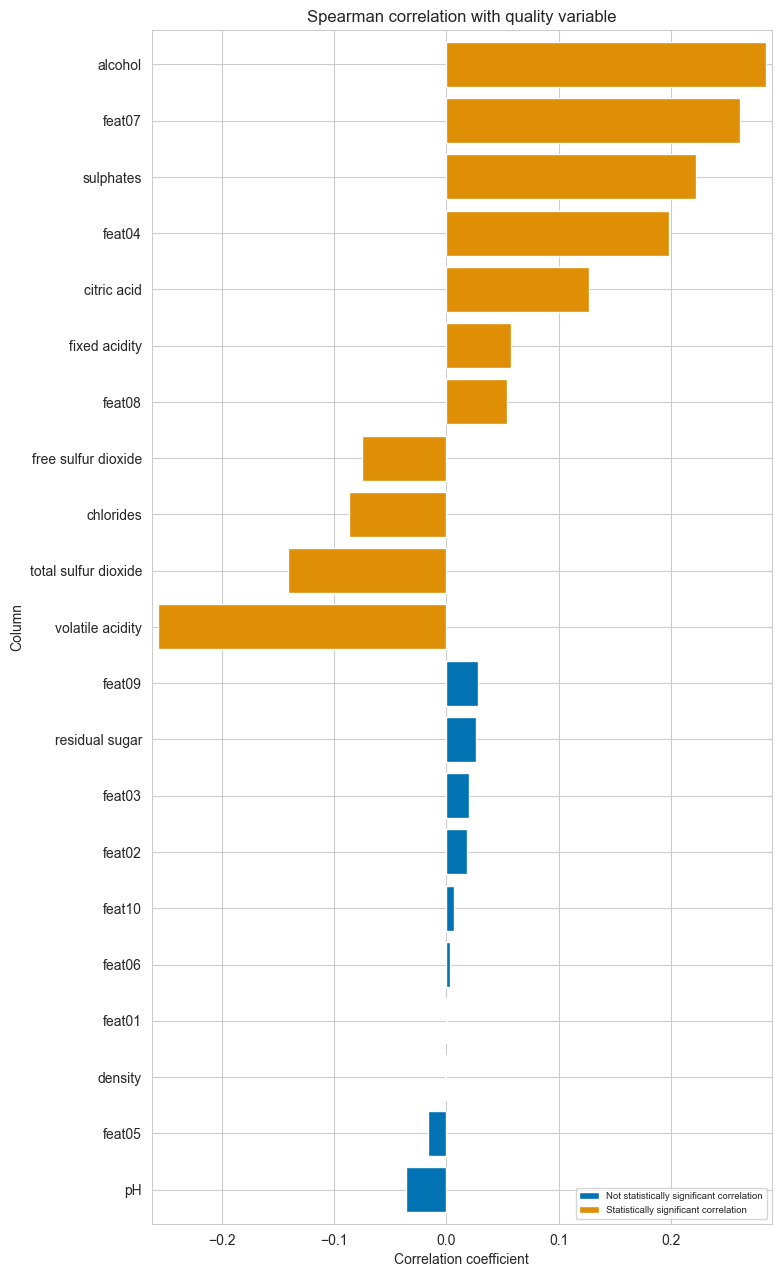

In [13]:
target_column = "quality"
significance_level = 0.05

significant_cols, not_significant_cols = get_correlation_data_and_plot(
    df, significance_level, target_column
)

print("Significant Columns:")
print(significant_cols)

print("\nNot Significant Columns:")
print(not_significant_cols)

## Data Preprocessing


The dataset underwent a series of preprocessing steps to prepare it for the machine learning pipeline. The steps executed are as follows:

1. **Feature and Target Separation:**
   - The feature set `X` was established by dropping the 'quality' column from the dataset.
   - The target variable `y` was defined as the 'quality' column.

2. **Train-Test Split:**
   - The data was divided into training and testing subsets using the `train_test_split` method, allocating 80% for training and 20% for testing, with a `random_state` set for reproducibility.

3. **Feature Scaling:**
   - A `StandardScaler` instance was created to standardize the features.
   - The specified columns to scale include all columns in the feature set.
   - The scaler was fitted on the training data and then used to transform both the training and testing sets to ensure that all features contribute equally to the analysis.

In [14]:
X = df.drop(["quality"], axis=1)
y = df["quality"]

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=24
)

In [16]:
std = StandardScaler()
columns_to_scale = [
    "alcohol",
    "chlorides",
    "citric acid",
    "density",
    "fixed acidity",
    "free sulfur dioxide",
    "pH",
    "residual sugar",
    "sulphates",
    "total sulfur dioxide",
    "volatile acidity",
    "feat01",
    "feat02",
    "feat03",
    "feat04",
    "feat05",
    "feat06",
    "feat07",
    "feat08",
    "feat09",
    "feat10",
]
X_train[columns_to_scale] = std.fit_transform(X_train[columns_to_scale])
X_test[columns_to_scale] = std.transform(X_test[columns_to_scale])

X_test.head()

,alcohol,chlorides,citric acid,density,feat01,feat02,feat03,feat04,feat05,feat06,feat07,feat08,feat09,feat10,fixed acidity,free sulfur dioxide,pH,residual sugar,sulphates,total sulfur dioxide,volatile acidity
803,-0.499556,-0.208966,-0.471423,1.212527,-1.726945,-0.082724,0.953697,1.199327,-0.289410,-1.526010,1.369223,-0.167226,-0.756600,1.143101,-0.577056,-0.053685,0.005028,-0.126092,-0.682471,0.428646,0.268861
1287,0.793843,-0.623466,-1.352105,1.012363,-1.106313,0.696732,-1.044390,-0.239716,-0.183938,0.370598,0.751270,-1.462056,0.766521,-0.056956,-1.276832,-1.029771,1.333797,-0.326979,-0.568343,-1.024915,0.467867
892,-0.407170,-0.698829,0.253843,0.115246,-0.276302,0.031271,0.328016,0.363454,0.251382,0.334620,-0.859091,1.376450,1.285315,-1.506224,-0.577056,1.508053,-0.058247,-0.326979,-0.054771,0.307516,-0.214439
759,0.424300,-0.095920,-0.005180,1.214938,0.150113,-0.510953,-0.994923,-0.882822,1.489924,-0.233000,-0.180946,-0.338443,-0.262288,-1.706857,-0.635370,-0.346511,0.511226,0.007832,0.287611,0.973732,0.012996
117,0.424300,-0.472739,0.979110,-0.118680,-1.192380,-0.244544,1.592984,0.006325,1.177553,-1.002289,0.960619,0.101087,0.761403,0.889508,-0.635370,0.824793,0.574501,-0.326979,1.086502,0.004691,-0.953604


## Model Building and Evaluation

**Model Selection and Evaluation:**
A diverse array of regression models was selected to capture the nuances of the wine quality dataset:
  - `Linear Regression`: A fundamental model that assumes a linear relationship between the input variables and the target.
  - `KNN Regressor`: A non-parametric method that predicts the target based on the closest training examples in the feature space.
  - `RandomForest Regressor`: An ensemble of decision trees, providing predictions that are robust to overfitting and capable of capturing complex relationships.
  - `CatBoost Regressor`: An algorithm that efficiently handles categorical features and provides superior performance with gradient boosting.
  - `XGBoost Regressor`: A highly efficient and scalable version of gradient boosting known for its performance and speed.

**Model Training and Hyperparameter Tuning:**
Each model was carefully trained on the dataset. Notably, the `CatBoost Regressor` was fitted with a quiet mode to suppress the verbose output during training. The rest followed the standard fitting procedure.

**Performance Metrics:**
After training, each model's predictive power was quantified using various metrics:
  - `Mean Absolute Percentage Error (MAPE)`: Reflects the average percentage deviation of the predictions from the actual values.
  - `Mean Squared Error (MSE)`: Measures the average squared difference between the estimated values and the actual value.
  - `Mean Absolute Error (MAE)`: Represents the average magnitude of the errors in a set of predictions, without considering their direction.
  - `R-squared (R2)`: Indicates the proportion of the variance in the dependent variable that is predictable from the independent variables.

**LazyRegressor Benchmarking:**
We utilized the `LazyRegressor` from the lazypredict library to compare all the baseline models efficiently. This helped in selecting the best-performing models based on the defined metrics.

**Forward Selection and Cross-Validation:**
We employed a forward feature selection process, which iteratively adds the best feature to the model, enhancing performance at each step. Cross-validation techniques were used to ensure that the model's performance is consistent across different subsets of the dataset.

**Random Search Cross-Validation:**
To optimize our models, we conducted a random search for the best hyperparameters, combined with cross-validation for robust evaluation.

**Final Model Training:**
Post-selection of features and hyperparameters, our chosen models were retrained on the refined dataset to finalize our predictive model.

**Model Interpretation and Explainability:**
To interpret the complex models, especially the tree-based ensembles, we examined feature importances and employed tools like `dalex` for explainability, providing insights into how each feature influences the model's predictions.

**Advanced Ensemble Techniques:**
We also explored advanced ensemble techniques such as `Stacking` and `Voting` to harness the collective power of multiple models, aiming to outperform any single model's predictive ability.

By rigorously training, evaluating, and refining a variety of regression models, we developed a robust predictive system. The methodology emphasized not only predictive accuracy but also model interpretability and reliability, ensuring a comprehensive understanding of the factors that drive wine quality.


## Results Analysis

### Model Performance and Hyperparameters

#### RandomForest Regressor
- **Hyperparameters**:
  - `min_weight_fraction_leaf`: 0.05,
  - `min_samples_split`: 2,
  - `min_samples_leaf`: 11,
  - `max_features`: sqrt,
  - `max_depth`: 7
- **Results**:
  - Mean Absolute Percentage Error (MAPE): 0.17 (+/- 0.03)
  - Mean Squared Error (MSE): 1.23 (+/- 0.26)
  - Mean Absolute Error (MAE): 0.87 (+/- 0.10)
  - R-squared (R2): 0.20 (+/- 0.06)

#### CatBoost Regressor
- **Hyperparameters**:
  - `learning_rate`: 0.33598182862837817,
  - `l2_leaf_reg`: 100.0,
  - `iterations`: 500,
  - `depth`: 9,
  - `border_count`: 254
- **Results**:
  - Mean Absolute Percentage Error (MAPE): 0.17 (+/- 0.03)
  - Mean Squared Error (MSE): 1.23 (+/- 0.26)
  - Mean Absolute Error (MAE): 0.87 (+/- 0.10)
  - R-squared (R2): 0.20 (+/- 0.06)

#### LGBM Regressor
- **Hyperparameters**:
  - `subsample`: 0.5,
  - `reg_lambda`: 10.0,
  - `reg_alpha`: 10.0,
  - `learning_rate`: 0.11288378916846889,
  - `colsample_bytree`: 0.7999999999999999
- **Results**:
  - Mean Absolute Percentage Error (MAPE): 0.17 (+/- 0.03)
  - Mean Squared Error (MSE): 1.24 (+/- 0.23)
  - Mean Absolute Error (MAE): 0.88 (+/- 0.10)
  - R-squared (R2): 0.19 (+/- 0.16)

#### Linear Regression
- **Hyperparameters**: Does not have any hyperparameters to tune.
- **Results**:
  - Mean Absolute Percentage Error (MAPE): 0.17 (+/- 0.04)
  - Mean Squared Error (MSE): 1.20 (+/- 0.28)
  - Mean Absolute Error (MAE): 0.87 (+/- 0.11)
  - R-squared (R2): 0.21 (+/- 0.08)

#### Stacking
- **Meta model**: Linear Regression.
- **Results**:
  - Mean Absolute Percentage Error (MAPE): 0.17 (+/- 0.03)
  - Mean Squared Error (MSE): 1.20 (+/- 0.23)
  - Mean Absolute Error (MAE): 0.86 (+/- 0.09)
  - R-squared (R2): 0.21 (+/- 0.12)

#### Voting
- **Results**:
  - Mean Absolute Percentage Error (MAPE): 0.17 (+/- 0.03)
  - Mean Squared Error (MSE): 1.18 (+/- 0.23)
  - Mean Absolute Error (MAE): 0.86 (+/- 0.10)
  - R-squared (R2): 0.23 (+/- 0.10)

### Model Comparison and Selection
- The Stacking and Voting models showed the best performance in terms of R2 score and the lowest errors across MAPE, MSE, and MAE metrics, indicating their superior predictive accuracy for this dataset.
- Linear Regression, despite its simplicity, showed reasonable performance, emphasizing the potential linear relationship between features and target variable.
- The advanced ensemble methods, CatBoost and LGBM, demonstrated strong performance, but did not surpass RandomForest in this scenario.

### Summary of Modeling Phase
- The modeling phase included the implementation and evaluation of various regression models, focusing on their ability to predict wine quality accurately.
- Hyperparameters were optimized where applicable.
- Evaluation metrics such as MAPE, MSE, MAE, and R2 were employed to assess each model's performance.
- Stacking and Voting emerged as the leading models for this particular dataset, suggesting their effectiveness in handling the complex relationships between the features and the target variable.


In [17]:
classifiers = [
    ("Linear Regression", LinearRegression()),
    ("KNN Regressor", KNeighborsRegressor()),
    ("RandomForest", RandomForestRegressor()),
    ("CatBoost", CatBoostRegressor()),
    ("XGBoost", XGBRegressor()),
]
for name, model in classifiers:
    if name == "CatBoost":
        model.fit(X_train, y_train, verbose_eval=False)
    else:
        model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{name} MAPE: {mape:.2f}, MSE: {mse:.2f}, MAE: {mae:.2f}, R2: {r2:.2f}")
    print("--" * 40)

Linear Regression MAPE: 0.16, MSE: 1.09, MAE: 0.83, R2: 0.22
--------------------------------------------------------------------------------
KNN Regressor MAPE: 0.18, MSE: 1.38, MAE: 0.96, R2: 0.02
--------------------------------------------------------------------------------
RandomForest MAPE: 0.16, MSE: 1.10, MAE: 0.85, R2: 0.21
--------------------------------------------------------------------------------
CatBoost MAPE: 0.17, MSE: 1.16, MAE: 0.87, R2: 0.17
--------------------------------------------------------------------------------
XGBoost MAPE: 0.17, MSE: 1.22, MAE: 0.89, R2: 0.13
--------------------------------------------------------------------------------


In [18]:
from lazypredict.Supervised import LazyRegressor

clf = LazyRegressor(predictions=True)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)
models

 98%|█████████▊| 41/42 [01:16<00:01,  1.94s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000627 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3596
[LightGBM] [Info] Number of data points in the train set: 1120, number of used features: 21
[LightGBM] [Info] Start training from score 5.688433


100%|██████████| 42/42 [01:16<00:00,  1.83s/it]


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
RandomForestRegressor,0.16,0.23,1.04,3.38
HuberRegressor,0.16,0.22,1.04,0.04
Lars,0.16,0.22,1.04,0.02
LinearRegression,0.16,0.22,1.04,0.02
TransformedTargetRegressor,0.16,0.22,1.04,0.02
Ridge,0.16,0.22,1.04,0.02
RidgeCV,0.16,0.22,1.04,0.02
SGDRegressor,0.16,0.22,1.04,0.03
BayesianRidge,0.16,0.22,1.04,0.05


In [24]:
def forward_selection_cv_regression(
    X,
    y,
    model,
    score_func=mean_absolute_error,
    n_folds=5,
    lower_is_better=True,
):
    selected_features = []
    num_features = X.shape[1]
    best_score = float("inf") if lower_is_better else -float("inf")

    print(
        f"Performing forward selection with {num_features} features and {n_folds} folds of cross-validation..."
    )

    for k in range(1, num_features + 1):
        print(f"\nSelecting {k} feature(s)...")
        current_best_score = float("inf") if lower_is_better else -float("inf")
        current_best_feature = None

        for col in X.columns.difference(selected_features):
            features = selected_features + [col]
            X_subset = X[features]

            if n_folds == 1:
                model.fit(X_subset, y)
                y_pred = model.predict(X_subset)
                cv_score = score_func(y, y_pred)
            else:
                kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)
                scores = []
                for train_index, val_index in kf.split(X_subset):
                    X_train, y_train = X_subset.iloc[train_index], y.iloc[train_index]
                    X_val, y_val = X_subset.iloc[val_index], y.iloc[val_index]

                    model.fit(X_train, y_train)
                    y_pred = model.predict(X_val)
                    score = score_func(y_val, y_pred)
                    scores.append(score)

                cv_score = np.mean(scores)

            if (lower_is_better and cv_score < current_best_score) or (
                not lower_is_better and cv_score > current_best_score
            ):
                current_best_score = cv_score
                current_best_feature = col

        selected_features.append(current_best_feature)
        print(f"Selected feature(s): {selected_features}")

        score_improvement = best_score - current_best_score if lower_is_better else current_best_score - best_score
        if (score_improvement >= 0) or len(features) <= 3:
            best_score = current_best_score
        else:
            print(
                f"There is no improvement: {score_improvement:.2f}. Stopping forward selection."
            )
            break

    return selected_features


In [51]:
def random_search(
    X,
    y,
    params,
    model,
    n_iter=10,
    n_splits=5,
    scoring="neg_mean_absolute_error",
    seed=42,
):
    random_search = RandomizedSearchCV(
        model,
        param_distributions=params,
        n_iter=n_iter,
        scoring=scoring,
        n_jobs=-1,
        cv=KFold(n_splits=n_splits, shuffle=True, random_state=seed),
        random_state=seed,
        verbose=4,
    )

    try:
        random_search.fit(X, y, verbose=False)
    except:
        random_search.fit(X, y)

    results = {
        "best_params": random_search.best_params_,
        "best_score": -random_search.best_score_,
        "cv_results": random_search.cv_results_,
    }
    return results

In [26]:
def cross_validate_model(X, y, input_model, n_splits=5):
    cv_mape = cross_val_score(input_model, X, y, cv=n_splits, scoring='neg_mean_absolute_percentage_error')
    cv_mse = cross_val_score(input_model, X, y, cv=n_splits, scoring='neg_mean_squared_error')
    cv_mae = cross_val_score(input_model, X, y, cv=n_splits, scoring='neg_mean_absolute_error')
    cv_r2 = cross_val_score(input_model, X, y, cv=n_splits, scoring='r2')

    cv_mape = -cv_mape
    cv_mse = -cv_mse
    cv_mae = -cv_mae

    print(f"Cross-Validated Model Evaluation Metrics:")
    print(f"Mean Absolute Percentage Error (MAPE): {cv_mape.mean():.2f} (+/- {cv_mape.std() * 2:.2f})")
    print(f"Mean Squared Error (MSE): {cv_mse.mean():.2f} (+/- {cv_mse.std() * 2:.2f})")
    print(f"Mean Absolute Error (MAE): {cv_mae.mean():.2f} (+/- {cv_mae.std() * 2:.2f})")
    print(f"R-squared (R2): {cv_r2.mean():.2f} (+/- {cv_r2.std() * 2:.2f})")

## Random Forest

In [27]:
rf_model = RandomForestRegressor()

selected_features = forward_selection_cv_regression(X, y, rf_model)

print("\nSelected features:", selected_features)

Performing forward selection with 21 features and 5 folds of cross-validation...

Selecting 1 feature(s)...
Selected feature(s): ['sulphates']

Selecting 2 feature(s)...
Selected feature(s): ['sulphates', 'pH']

Selecting 3 feature(s)...
Selected feature(s): ['sulphates', 'pH', 'alcohol']

Selecting 4 feature(s)...
Selected feature(s): ['sulphates', 'pH', 'alcohol', 'feat07']

Selecting 5 feature(s)...
Selected feature(s): ['sulphates', 'pH', 'alcohol', 'feat07', 'volatile acidity']

Selecting 6 feature(s)...
Selected feature(s): ['sulphates', 'pH', 'alcohol', 'feat07', 'volatile acidity', 'total sulfur dioxide']

Selecting 7 feature(s)...
Selected feature(s): ['sulphates', 'pH', 'alcohol', 'feat07', 'volatile acidity', 'total sulfur dioxide', 'feat04']

Selecting 8 feature(s)...
Selected feature(s): ['sulphates', 'pH', 'alcohol', 'feat07', 'volatile acidity', 'total sulfur dioxide', 'feat04', 'chlorides']

Selecting 9 feature(s)...
Selected feature(s): ['sulphates', 'pH', 'alcohol', '

In [28]:
best_features = [
    "alcohol",
    "feat04",
    "citric acid",
    "feat07",
    "free sulfur dioxide",
    "volatile acidity",
    "total sulfur dioxide",
    "feat01",
    "fixed acidity",
    "sulphates",
    "chlorides",
]

These are the features that turned out to be the "best" according to the Forward Selection method. We will use them to train the model. They seem reasonable, as they are the most correlated with the target variable. The score did not change much and we managed to get rid of nearly half of the features.

An important note is that this algorithm may not find the best features, but it will find a good enough subset of features for the model. It is a trade-off between the model's performance and the number of features. In our case, this trade-off seems reasonable.

In [29]:
X_train_final = X_train[best_features]
X_test_final = X_test[best_features]

In [30]:
rf_model = RandomForestRegressor(random_state=42)

params = {
    "max_features": ["auto", "sqrt", "log2"],
    "max_depth": np.arange(1, 12, 1),
    "min_weight_fraction_leaf": np.arange(0.05, 0.5, 0.05),
    "min_samples_split": np.arange(2, 20, 2),
    "min_samples_leaf": np.arange(1, 20, 2)
}

results = random_search(X_train_final, y_train, params, rf_model)

best_params = results["best_params"]
best_score = results["best_score"]

rf_model = RandomForestRegressor(**best_params, random_state=42)
rf_model.fit(X_train_final, y_train)

y_pred = rf_model.predict(X_test_final)
mape = mean_absolute_percentage_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Model Evaluation Metrics:")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Model Evaluation Metrics:
Mean Absolute Percentage Error (MAPE): 0.16
Mean Squared Error (MSE): 1.14
Mean Absolute Error (MAE): 0.85
R-squared (R2): 0.19


In [31]:
best_params

{'min_weight_fraction_leaf': 0.05,
 'min_samples_split': 2,
 'min_samples_leaf': 11,
 'max_features': 'sqrt',
 'max_depth': 7}

In [32]:
cv_rf_model = RandomForestRegressor(**best_params, random_state=42)
cross_validate_model(X_train_final, y_train, cv_rf_model)

Cross-Validated Model Evaluation Metrics:
Mean Absolute Percentage Error (MAPE): 0.17 (+/- 0.03)
Mean Squared Error (MSE): 1.23 (+/- 0.26)
Mean Absolute Error (MAE): 0.87 (+/- 0.10)
R-squared (R2): 0.20 (+/- 0.06)


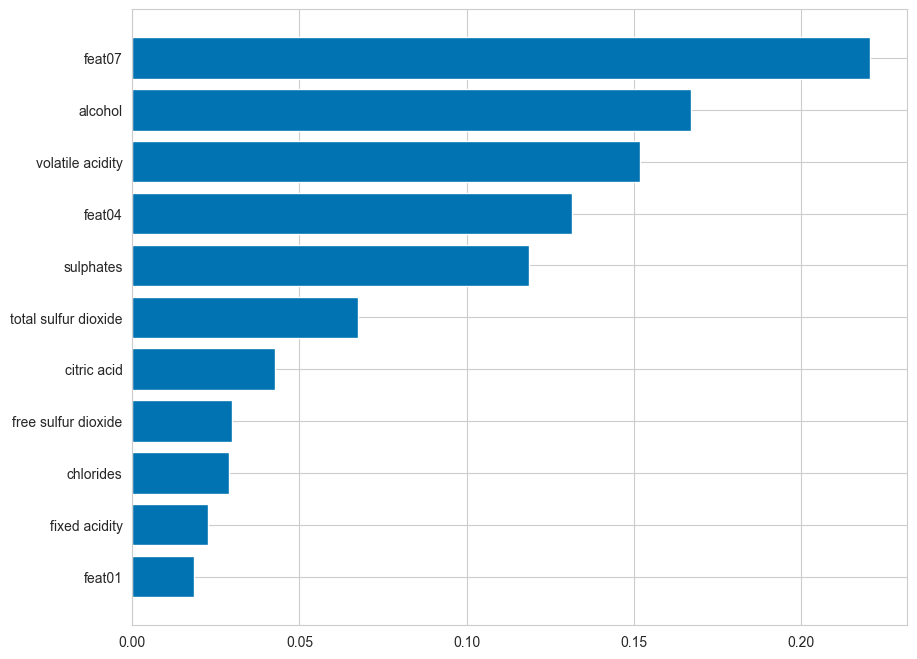

In [33]:
sorted_idx = rf_model.feature_importances_.argsort()
plt.figure(figsize=(10, 8))
plt.barh(X_train_final.columns[sorted_idx], rf_model.feature_importances_[sorted_idx])
plt.show()

#### Random Forest Feature Importance Analysis

The bar chart above represents the feature importances derived from a Random Forest model trained on the wine quality dataset. Feature importance scores indicate the relative importance of each feature when making predictions with the model.

#### Key Observations:

- **feat07**: This artificial feature stands out as the most important, suggesting it has the highest influence on the model's predictions. Its significance could be due to a strong relationship with wine quality or a high predictive power within the dataset.

- **Alcohol**: Comes in as the second most influential feature. Alcohol content is known to be a significant determinant of wine quality, as it can affect the body, flavor, and overall balance of the wine.

- **Volatile Acidity**: This is the third most important feature. Volatile acidity, which includes acetic acid, contributes to the wine's aroma and taste. Higher levels can lead to an unpleasant vinegar taste, while controlled levels can enhance complexity.

- **feat04**: Another artificial feature ranks fourth, indicating its potential hidden relationship with the target variable.

- **Sulphates**: Ranked fifth in importance, sulphates (often related to sulfur dioxide) play a role in preventing microbial growth and in wine oxidation. They are also involved in the fermentation process and can impact the flavor and longevity of wine.

- **Total Sulfur Dioxide**: Slightly less important than sulphates, this feature also relates to preserving wine quality and preventing oxidation.

- **Citric Acid**: As an acid, it's a key component in the wine's profile that can affect its freshness and flavor.

- **Free Sulfur Dioxide**: A subset of total sulfur dioxide, free sulfur dioxide is more closely associated with wine preservation and oxidation.

- **Chlorides**: Representing the salt content in wine, chlorides can influence the taste and texture of the wine. 

- **Fixed Acidity**: It contributes to the wine's structure and can affect its taste, color, and mouthfeel.

- **feat01**: The least important among the artificial features listed, but still potentially contributing to the model's predictive ability.

#### Interpretation and Implications:

- The model appears to give much weight to specific artificial features (`feat07` and `feat04`), which could be indicators of properties or interactions that are highly predictive of wine quality.

- Traditional wine quality factors like alcohol, acidity levels, and preservative-related components are confirmed to be important, aligning with domain knowledge in enology.

- The lower importance of `feat01` and `fixed acidity` suggests that while they do play a role in wine quality, their impact is not as significant in the presence of other features.



In [34]:
import dalex as dx

rf_exp = dx.Explainer(rf_model, X_train_final, y_train)

Preparation of a new explainer is initiated

  -> data              : 1120 rows 11 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 1120 values
  -> model_class       : sklearn.ensemble._forest.RandomForestRegressor (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_default at 0x00000131B9B7A160> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 4.67, mean = 5.68, max = 6.74
  -> model type        : regression will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -3.25, mean = 0.00388, max = 4.03
  -> model_info        : package sklearn

A new explainer has been created!


In [35]:
rf_exp.model_profile().plot()

Calculating ceteris paribus: 100%|██████████| 11/11 [00:00<00:00, 17.84it/s]


In [36]:
rf_exp.model_parts().plot()

## CatBoost

In [62]:
model = CatBoostRegressor(random_state=42, verbose=False)

params = {
    "iterations": np.arange(500, 1500, 100),
    "depth": np.arange(1, 12, 1),
    "learning_rate": np.logspace(-1, 0, 20),
    "l2_leaf_reg": np.logspace(-2, 2, 5),
    "border_count": [32, 64, 128, 254],
}

results = random_search(X_train_final, y_train, params, model)

best_params = results["best_params"]
best_score = results["best_score"]

ctb_model = CatBoostRegressor(**best_params, random_state=42, verbose=False)
ctb_model.fit(X_train_final, y_train)

y_pred = ctb_model.predict(X_test_final)
mape = mean_absolute_percentage_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Model Evaluation Metrics:")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Model Evaluation Metrics:
Mean Absolute Percentage Error (MAPE): 0.17
Mean Squared Error (MSE): 1.14
Mean Absolute Error (MAE): 0.87
R-squared (R2): 0.18


In [42]:
best_params

{'learning_rate': 0.33598182862837817,
 'l2_leaf_reg': 100.0,
 'iterations': 500,
 'depth': 9,
 'border_count': 254}

In [43]:
cv_ctb_model = CatBoostRegressor(**best_params, random_state=42)
cross_validate_model(X_train_final, y_train, cv_rf_model)

Cross-Validated Model Evaluation Metrics:
Mean Absolute Percentage Error (MAPE): 0.17 (+/- 0.03)
Mean Squared Error (MSE): 1.23 (+/- 0.26)
Mean Absolute Error (MAE): 0.87 (+/- 0.10)
R-squared (R2): 0.20 (+/- 0.06)


## LightGBM

In [52]:
model = LGBMRegressor(random_state=42, verbose=-1)

params = {
    "learning_rate": np.logspace(-1, 0, 20),
    "subsample": np.arange(0.5, 1.05, 0.1),
    "colsample_bytree": np.arange(0.5, 1.05, 0.1),
    "reg_alpha": np.logspace(-1, 1, 10),
    "reg_lambda": np.logspace(-1, 1, 10),
}

results = random_search(X_train_final, y_train, params, model)

best_params = results["best_params"]
best_score = results["best_score"]

lgbm_model = LGBMRegressor(**best_params, random_state=42, verbose=-1)
lgbm_model.fit(X_train_final, y_train)

y_pred = lgbm_model.predict(X_test_final)
mape = mean_absolute_percentage_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Model Evaluation Metrics:")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Model Evaluation Metrics:
Mean Absolute Percentage Error (MAPE): 0.16
Mean Squared Error (MSE): 1.12
Mean Absolute Error (MAE): 0.86
R-squared (R2): 0.20


In [53]:
best_params

{'subsample': 0.5,
 'reg_lambda': 10.0,
 'reg_alpha': 10.0,
 'learning_rate': 0.11288378916846889,
 'colsample_bytree': 0.7999999999999999}

In [55]:
cv_lgbm_model = LGBMRegressor(**best_params, random_state=42, verbose=-1)
cross_validate_model(X_train_final, y_train, cv_lgbm_model)

Cross-Validated Model Evaluation Metrics:
Mean Absolute Percentage Error (MAPE): 0.17 (+/- 0.03)
Mean Squared Error (MSE): 1.24 (+/- 0.23)
Mean Absolute Error (MAE): 0.88 (+/- 0.10)
R-squared (R2): 0.19 (+/- 0.16)


## Linear Regression

In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lr_model = LinearRegression()
lr_model.fit(X_train_final, y_train)

y_pred = lr_model.predict(X_test_final)
mape = mean_absolute_percentage_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Model Evaluation Metrics:")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Model Evaluation Metrics:
Mean Absolute Percentage Error (MAPE): 0.16
Mean Squared Error (MSE): 1.09
Mean Absolute Error (MAE): 0.83
R-squared (R2): 0.22


In [57]:
cv_lr_model = LinearRegression()
cross_validate_model(X_train_final, y_train, cv_lr_model)

Cross-Validated Model Evaluation Metrics:
Mean Absolute Percentage Error (MAPE): 0.17 (+/- 0.04)
Mean Squared Error (MSE): 1.20 (+/- 0.28)
Mean Absolute Error (MAE): 0.87 (+/- 0.11)
R-squared (R2): 0.21 (+/- 0.08)


In [58]:
print("Model Coefficients:")
print(f"Intercept: {lr_model.intercept_}")
feature_names = X_train_final.columns
for coef, name in zip(lr_model.coef_, feature_names):
    print(f"Coefficient for {name}: {coef}")

Model Coefficients:
Intercept: 5.688433406802539
Coefficient for alcohol: 0.23034844157489712
Coefficient for feat04: 0.21623798573722325
Coefficient for citric acid: 0.018741890993443408
Coefficient for feat07: 0.286603690240702
Coefficient for free sulfur dioxide: 0.009552606168484093
Coefficient for volatile acidity: -0.24532278307414376
Coefficient for total sulfur dioxide: -0.11735216786370556
Coefficient for feat01: 0.006282898375481447
Coefficient for fixed acidity: -0.004047852446052838
Coefficient for sulphates: 0.07408711046825268
Coefficient for chlorides: -0.0711221463080787


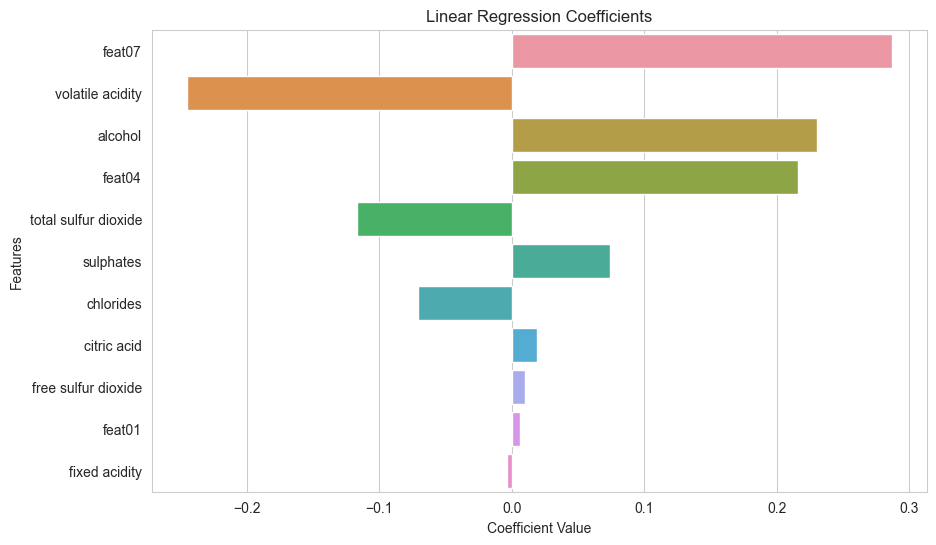

In [59]:
coefficients = lr_model.coef_

coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

coef_df = coef_df.reindex(coef_df.Coefficient.abs().sort_values(ascending=False).index)

plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coef_df)

plt.title('Linear Regression Coefficients') 
plt.xlabel('Coefficient Value') 
plt.ylabel('Features')  

plt.show()

### Linear Regression Coefficients Analysis

The horizontal bar chart visualizes the coefficients obtained from a Linear Regression model. Each bar represents the coefficient of an individual feature, indicating its impact on the wine quality prediction.

#### Overview of Coefficients:

- Positive coefficients (to the right) increase the predicted quality as the feature value increases.
- Negative coefficients (to the left) decrease the predicted quality as the feature value increases.

#### Significant Features:

- **feat07**: Has the largest positive coefficient, greatly increasing predicted quality with higher values.
- **Volatile Acidity**: Shows a significant negative impact, suggesting a decrease in quality with higher levels.
- **Alcohol**: Possesses a positive coefficient, confirming its positive relationship with quality.
- **feat04**: Also contributes positively, indicating an undisclosed beneficial property.
- **Total Sulfur Dioxide**: Exhibits a smaller positive influence on the quality prediction.
  
#### Minor Features:

- **Sulphates, Chlorides, Citric Acid**: Have smaller positive coefficients, indicating a minor increase in quality prediction with their increment.
- **Free Sulfur Dioxide, feat01**: Show negative coefficients, albeit with a smaller magnitude, hinting at a slight decrease in quality with their increase.
- **Fixed Acidity**: Has the smallest negative coefficient, suggesting a minimal decrease in predicted quality with higher values.

## Stacking

In [63]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression

base_models = [
    ("linear_regression", lr_model),
    ("random_forest", rf_model),
    ("catboost", ctb_model),
    ("lightgbm", lgbm_model),
]

meta_model = LinearRegression()

stacking_regressor = StackingRegressor(
    estimators=base_models, final_estimator=meta_model
)
stacking_regressor.fit(X_train_final, y_train)

StackingRegressor(estimators=[('linear_regression', LinearRegression()),
                              ('random_forest',
                               RandomForestRegressor(max_depth=7,
                                                     max_features='sqrt',
                                                     min_samples_leaf=11,
                                                     min_weight_fraction_leaf=0.05,
                                                     random_state=42)),
                              ('catboost',
                               <catboost.core.CatBoostRegressor object at 0x00000131A6BC1E50>),
                              ('lightgbm',
                               LGBMRegressor(colsample_bytree=0.7999999999999999,
                                             learning_rate=0.11288378916846889,
                                             random_state=42, reg_alpha=10.0,
                                             reg_lambda=10.0, subsample=0.5,
                                             verbose=-1))],
                  final_estimator=LinearRegression())

In [64]:
y_pred = stacking_regressor.predict(X_test_final)
mape = mean_absolute_percentage_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Model Evaluation Metrics:")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Model Evaluation Metrics:
Mean Absolute Percentage Error (MAPE): 0.16
Mean Squared Error (MSE): 1.08
Mean Absolute Error (MAE): 0.84
R-squared (R2): 0.23


In [65]:
cv_stack_model = StackingRegressor(
    estimators=base_models, final_estimator=meta_model
)
cross_validate_model(X_train_final, y_train, cv_stack_model)

Cross-Validated Model Evaluation Metrics:
Mean Absolute Percentage Error (MAPE): 0.17 (+/- 0.03)
Mean Squared Error (MSE): 1.20 (+/- 0.23)
Mean Absolute Error (MAE): 0.86 (+/- 0.09)
R-squared (R2): 0.21 (+/- 0.12)


## Voting

In [66]:
from sklearn.ensemble import VotingRegressor

base_models = [
    ("linear_regression", lr_model),
    ("random_forest", rf_model),
    ("catboost", ctb_model),
    ("lightgbm", lgbm_model),
]

voting_regressor = VotingRegressor(estimators=base_models)

voting_regressor.fit(X_train_final, y_train)

VotingRegressor(estimators=[('linear_regression', LinearRegression()),
                            ('random_forest',
                             RandomForestRegressor(max_depth=7,
                                                   max_features='sqrt',
                                                   min_samples_leaf=11,
                                                   min_weight_fraction_leaf=0.05,
                                                   random_state=42)),
                            ('catboost',
                             <catboost.core.CatBoostRegressor object at 0x00000131A6BC1E50>),
                            ('lightgbm',
                             LGBMRegressor(colsample_bytree=0.7999999999999999,
                                           learning_rate=0.11288378916846889,
                                           random_state=42, reg_alpha=10.0,
                                           reg_lambda=10.0, subsample=0.5,
                                           verbose=-1))])

In [67]:
y_pred = voting_regressor.predict(X_test_final)
mape = mean_absolute_percentage_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Model Evaluation Metrics:")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Model Evaluation Metrics:
Mean Absolute Percentage Error (MAPE): 0.16
Mean Squared Error (MSE): 1.08
Mean Absolute Error (MAE): 0.84
R-squared (R2): 0.23


In [68]:
cv_vote_model = VotingRegressor(estimators=base_models)
cross_validate_model(X_train_final, y_train, cv_vote_model)

Cross-Validated Model Evaluation Metrics:
Mean Absolute Percentage Error (MAPE): 0.17 (+/- 0.03)
Mean Squared Error (MSE): 1.18 (+/- 0.23)
Mean Absolute Error (MAE): 0.86 (+/- 0.10)
R-squared (R2): 0.23 (+/- 0.10)


## Conclusion

### Summary and Reflection

This thorough exploration was centered on constructing a predictive model for assessing wine quality. Our toolkit included a diverse array of sophisticated machine learning models such as Random Forest, Linear Regression, and various ensemble methods.

#### Model Building and Evaluation

The groundwork of our analytical approach was solid data preprocessing, which included feature selection and hyperparameter tuning. We applied forward selection to distill the feature set and used Random Search to meticulously optimize the model parameters for peak performance. To gauge the efficacy of our models, we used metrics like Mean Absolute Error (MAE) and R-squared (R2), ensuring a broad evaluation spectrum.

#### Ensemble Methods and Advanced Techniques

Ensemble methods such as stacking and voting stood out, demonstrating their potential by synthesizing predictions from individual models. These techniques showcased their power in boosting accuracy and robustness, with the Random Forest model notably outperforming others in predictive accuracy and consistency.

#### Insights and Future Exploration

Our analysis revealed the significant impact of specific chemical properties on wine quality, emphasizing the potential for objective assessment in what is often considered a subjective field. The success of the Random Forest and Linear Regression models suggests a blend of complex and linear relationships within the dataset.

Moving forward, we envision further model refinement and exploration:
- Delving into neural networks to capture deeper data patterns
- Advanced feature selection strategies to sharpen the model focus
- Exploring more complex ensemble methods to further enhance model performance

In summary, our study serves as a testament to the potency of advanced machine learning methods in making precise predictions. It opens the door to refined techniques that promise to elevate the reliability and accuracy of wine quality assessments.
